# Python Statistics and Plotting Tutorial Jupyter Notebook

## BGSP 7030 - Natour

## Import Python Libraries and Tools

In [257]:
import pandas as pd

In [258]:
import numpy as np

In [259]:
import scipy as sp

In [260]:
import matplotlib.pyplot as plt

In [261]:
import sys

In [262]:
import os

In [263]:
from pandas import plotting as pdplt

## Import dataset and interpret CSV data into a readable table with columns and data; then visualize the data

In [10]:
data = pd.read_csv('brain_size.csv', sep=';', na_values=".")

## Create an array of data; linspace = creating a data set of numbers that runs from -6 to +6;  

In [172]:
t = np.linspace(-6, 6, 20)

## Caculate the sine value and the cosine value

In [173]:
sin_t = np.sin(t)

In [174]:
cos_t = np.sin(t)

## Compile all the data into a array and visualize the data

In [175]:
lindata = pd.DataFrame({'t': t, 'sin': sin_t, 'cos': cos_t}) 

## Pull information about the data that was imported; Number of Entries and Columns

In [11]:
data.shape

(40, 8)

## Pull information about the column names within the csv data

In [12]:
data.columns

Index(['Unnamed: 0', 'Gender', 'FSIQ', 'VIQ', 'PIQ', 'Weight', 'Height',
       'MRI_Count'],
      dtype='object')

## Visualize the specific data from the Column "Gender"

## Caclulate the mean of the VIQ where the column gender states 'Female'

In [13]:
data[data['Gender'] == 'Female']['VIQ'].mean()

109.45

## Use Groupby commands to pull and analyze data about the dataframe array/table to make calculations

In [14]:
groupby_gender = data.groupby('Gender')

In [15]:
for gender, value in groupby_gender['VIQ']:
    print((gender, value.mean()))

('Female', 109.45)
('Male', 115.25)


In [16]:
groupby_gender.mean()

,Unnamed: 0,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
Gender,,,,,,,
Female,19.65,111.9,109.45,110.45,137.200000,65.765000,862654.6
Male,21.35,115.0,115.25,111.60,166.444444,71.431579,954855.4


## Plotting Matrix Data - Weight, Height, MRI_Cout

array([[<Axes: xlabel='Weight', ylabel='Weight'>,
        <Axes: xlabel='Height', ylabel='Weight'>,
        <Axes: xlabel='MRI_Count', ylabel='Weight'>],
       [<Axes: xlabel='Weight', ylabel='Height'>,
        <Axes: xlabel='Height', ylabel='Height'>,
        <Axes: xlabel='MRI_Count', ylabel='Height'>],
       [<Axes: xlabel='Weight', ylabel='MRI_Count'>,
        <Axes: xlabel='Height', ylabel='MRI_Count'>,
        <Axes: xlabel='MRI_Count', ylabel='MRI_Count'>]], dtype=object)

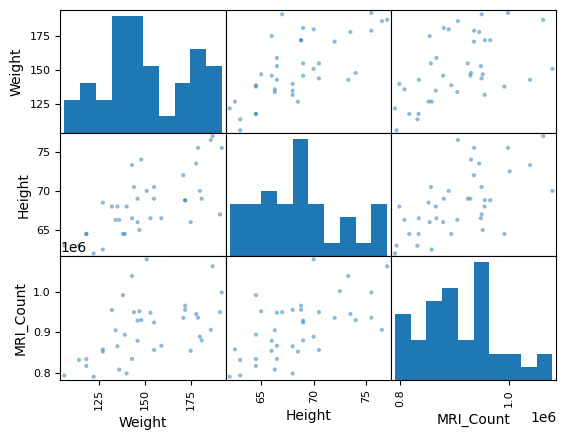

In [18]:
pdplt.scatter_matrix(data[['Weight', 'Height', 'MRI_Count']])

## Plotting Matrix Data - Weight, Height, MRI_Cout

array([[<Axes: xlabel='PIQ', ylabel='PIQ'>,
        <Axes: xlabel='VIQ', ylabel='PIQ'>,
        <Axes: xlabel='FSIQ', ylabel='PIQ'>],
       [<Axes: xlabel='PIQ', ylabel='VIQ'>,
        <Axes: xlabel='VIQ', ylabel='VIQ'>,
        <Axes: xlabel='FSIQ', ylabel='VIQ'>],
       [<Axes: xlabel='PIQ', ylabel='FSIQ'>,
        <Axes: xlabel='VIQ', ylabel='FSIQ'>,
        <Axes: xlabel='FSIQ', ylabel='FSIQ'>]], dtype=object)

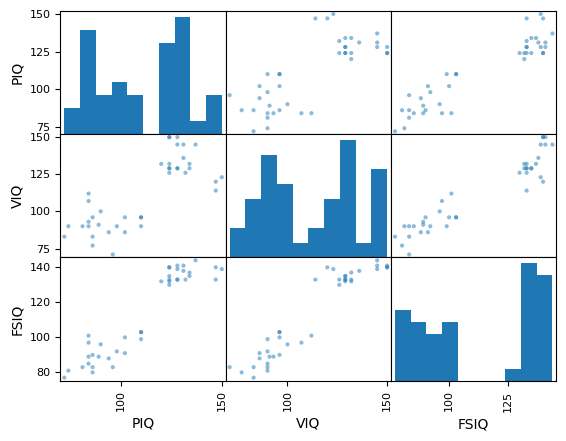

In [19]:
pdplt.scatter_matrix(data[['PIQ','VIQ','FSIQ']])

## Statistical data comparing various parts of the data set

In [20]:
from scipy import stats

In [21]:
stats.ttest_1samp(data['VIQ'], 0)

TtestResult(statistic=30.08809997084933, pvalue=1.3289196468727879e-28, df=39)

In [22]:
female_viq = data[data['Gender'] == 'Female']['VIQ']

In [23]:
male_viq = data[data['Gender'] == 'Male']['VIQ']

In [24]:
stats.ttest_ind(female_viq, male_viq)

TtestResult(statistic=-0.7726161723275012, pvalue=0.44452876778583217, df=38.0)

## Can run different types of t-tests that compare data in different ways

In [25]:
stats.ttest_ind(data['FSIQ'], data['PIQ'])

TtestResult(statistic=0.465637596380964, pvalue=0.6427725009414841, df=78.0)

In [26]:
stats.ttest_rel(data['FSIQ'], data['PIQ'])

TtestResult(statistic=1.7842019405859857, pvalue=0.08217263818364236, df=39)

In [27]:
stats.ttest_1samp(data['FSIQ'] - data['PIQ'], 0)

TtestResult(statistic=1.7842019405859857, pvalue=0.08217263818364236, df=39)

## Unsure of this error, maybe there's a variable I'm missing?)

In [28]:
stats.wilcoxon(data['FSIQ'], data['PIQ'])

/srv/conda/envs/notebook/lib/python3.9/site-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


WilcoxonResult(statistic=274.5, pvalue=0.10659492713506856)

# Linear Modeling, Multiple FActors, and AOV analysis

## numpy and panda already imported

In [29]:
x = np.linspace(-5, 5, 20)

In [30]:
np.random.seed(1)

## normal distributed noise

In [31]:
y = -5 + 3*x + 4 * np.random.normal(size=x.shape)

## Create a data frame containing all the relevant variables

In [32]:
data2 = pd.DataFrame({'x': x, 'y': y})

## Pull the OLS Model to create a linear fit model

In [33]:
import statsmodels

In [34]:
from statsmodels.formula.api import ols

In [35]:
model1 = ols("y ~ x", data2).fit()

In [36]:
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     74.03
Date:                Wed, 19 Jul 2023   Prob (F-statistic):           8.56e-08
Time:                        13:25:44   Log-Likelihood:                -57.988
No. Observations:                  20   AIC:                             120.0
Df Residuals:                      18   BIC:                             122.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.5335      1.036     -5.342      0.0

## Modeling Brain Size Data - data = brain size data, data2 = ran gen data

In [37]:
model2 = ols("VIQ ~ Gender + 1", data).fit()

In [38]:
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                    VIQ   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                    0.5969
Date:                Wed, 19 Jul 2023   Prob (F-statistic):              0.445
Time:                        13:25:52   Log-Likelihood:                -182.42
No. Observations:                  40   AIC:                             368.8
Df Residuals:                      38   BIC:                             372.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        109.4500      5.308     20.

In [39]:
data_fsiq = pd.DataFrame({'iq': data['FSIQ'], 'type': 'FSIQ'})

In [40]:
data_piq = pd.DataFrame({'iq': data['PIQ'], 'type': 'PIQ'})

In [41]:
data_long = pd.concat((data_fsiq, data_piq))

In [42]:
print(data_long)

     iq  type
0   133  FSIQ
1   140  FSIQ
2   139  FSIQ
3   133  FSIQ
4   137  FSIQ
..  ...   ...
35  128   PIQ
36  124   PIQ
37   94   PIQ
38   74   PIQ
39   89   PIQ

[80 rows x 2 columns]


In [43]:
model3 = ols("iq ~ type", data_long).fit()

In [44]:
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                     iq   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                    0.2168
Date:                Wed, 19 Jul 2023   Prob (F-statistic):              0.643
Time:                        13:26:04   Log-Likelihood:                -364.35
No. Observations:                  80   AIC:                             732.7
Df Residuals:                      78   BIC:                             737.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     113.4500      3.683     30.807      

In [45]:
sp.stats.ttest_ind(data['FSIQ'], data['PIQ'])

TtestResult(statistic=0.465637596380964, pvalue=0.6427725009414841, df=78.0)

# Creating multiple factor regression models

## Some example data first

In [46]:
data3 = pd.read_csv('iris.csv')

In [47]:
model3 = ols('sepal_width ~ name + petal_length', data3).fit()

In [48]:
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:            sepal_width   R-squared:                       0.478
Model:                            OLS   Adj. R-squared:                  0.468
Method:                 Least Squares   F-statistic:                     44.63
Date:                Wed, 19 Jul 2023   Prob (F-statistic):           1.58e-20
Time:                        13:26:16   Log-Likelihood:                -38.185
No. Observations:                 150   AIC:                             84.37
Df Residuals:                     146   BIC:                             96.41
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              2.9813      0

In [49]:
print(model3.f_test([0, 1, -1, 0]))

<F test: F=3.2453353465743175, p=0.07369058781700577, df_denom=146, df_num=1>


# Wage Data Visualization using Seaborn

## Import data file from URL if not already included in the files
## I don't understand why this doesn't work when I try to use the import setup defined by the other tutorial - it always seems to break the entire dataframe and corrupt all the other data variables I've created elsewhere in the script (even when they have other variable names). I think I am missing somethign with the pandas.DataFrame and function and structure. 

In [277]:
wages = pd.DataFrame()

AttributeError: module 'pandas' has no attribute 'DataFrame'

In [267]:
df = pd.read_csv('WageData.csv', sep=',', header=0)

In [268]:
import seaborn

In [269]:
seaborn.pairplot(df, vars=['WAGE', 'AGE', 'EDUCATION'], kind='reg')

AttributeError: module 'pandas' has no attribute 'DataFrame'

/srv/conda/envs/notebook/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


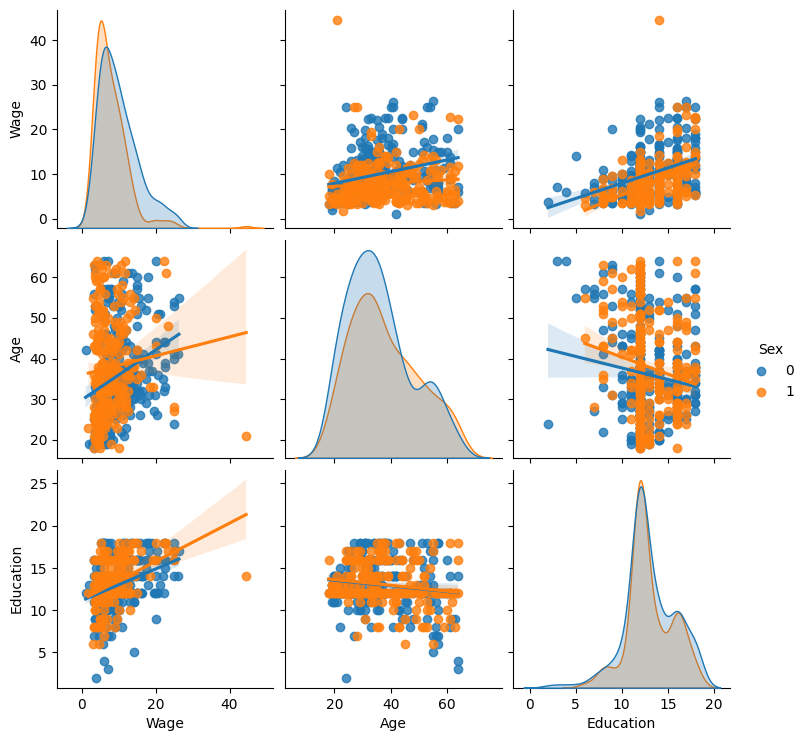

In [86]:
seaborn.pairplot(dataw, vars=['Wage', 'Age', 'Education'],
                 kind='reg', hue='Sex') 

/srv/conda/envs/notebook/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


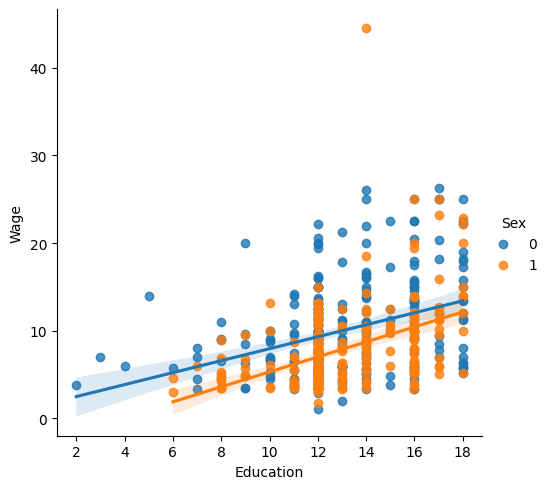

In [65]:
seaborn.lmplot(y='Wage', x='Education', data=dataw, hue='Sex')